# Data Engineering

Data Engineering, the process of gathering and preparing data for analysis, is a very big part of Data Science.

Datasets might not be formatted in the way you need (e.g. you have categorical features but your algorithm requires numerical features); or you might need to cross-reference some dataset to another that has a different format; or you might be dealing with a dataset that contains missing or invalid data.

These are just a few examples of why data retrieval and cleaning are so important.

## Retrieving data from the web

### requests

The first task you'll have on HW1 will be to retrieve some data from the Internet. Python has many built-in libraries that were developed over the years to do exactly that (e.g. urllib, urllib2, urllib3).

However, these libraries are very low-level and somewhat hard to use. They become especially cumbersome when you need to issue POST requests or authenticate against a web service.

Luckly, as with most tasks in Python, someone has developed a library that simplifies these tasks. In reality, the requests made both on this lab and on HW1 are fairly simple, and could easily be done using one of the built-in libraries. However, it is better to get acquainted to `requests` as soon as possible, since you will probably need it in the future.

In [4]:
# You tell Python that you want to use a library with the import statement.
import requests

Now that the requests library was imported into our namespace, we can use the functions offered by it.

In this case we'll use the appropriately named `get` function to issue a *GET* request. This is equivalent to typing a URL into your browser and hitting enter.

In [5]:
# Get the HU Wikipedia page
req = requests.get("https://en.wikipedia.org/wiki/Harvard_University")

Python is an Object Oriented language, and everything on it is an object. Even built-in functions such as `len` are just syntactic sugar for acting on object properties.

We will not dwell too long on OO concepts, but some of Python's idiosyncrasies will be easier to understand if we spend a few minutes on this subject.

When you evaluate an object itself, such as the `req` object we created above, Python will automatially call the `__str__()` or `__repr__()` method of that object. The default values for these methods are usually very simple and boring. The `req` object however has a custom implementation that shows the object type (i.e. `Response`) and the HTTP status number (200 means the request was successful).

In [6]:
req

<Response [200]>

Just to confirm, we will call the `type` function on the object to make sure it agrees with the value above.

In [7]:
type(req)

requests.models.Response

Another very nifty Python function is `dir`. You can use it to list all the properties of an object.

By the way, properties starting with a single and double underscores are usually not meant to be called directly.

In [8]:
dir(req)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__iter__',
 '__module__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

Right now `req` holds a reference to a *Request* object; but we are interested in the text associated with the web page, not the object itself.

So the next step is to assign the value of the `text` property of this `Request` object to a variable.

In [9]:
page = req.text
page

u'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Harvard University - Wikipedia</title>\n<script>document.documentElement.className = document.documentElement.className.replace( /(^|\\s)client-nojs(\\s|$)/, "$1client-js$2" );</script>\n<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Harvard_University","wgTitle":"Harvard University","wgCurRevisionId":746419732,"wgRevisionId":746419732,"wgArticleId":18426501,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from September 2014","All articles containing potentially dated statements","Articles with Wayback Machine links","Wikipedia indefinitely move-protected pages","Use mdy dates from September 2015","Wikipedia pages semi-protected against vandalism","Arti

Great! Now we have the text of the HU Wikipedia page. But this mess of HTML tags would be a pain to parse manually. Which is why we will use another very cool Python library called BeautifulSoup.

### BeautifulSoup

Parsing data would be a breeze if we could always use well formatted data sources, such as CSV, JSON, or XML; but some formats such as HTML are at the same time a very popular and a pain to parse.

One of the problems with HTML is that over the years browsers have evolved to be very forgiving of "malformed" syntax. Your browser is smart enough to detect some common problems, such as open tags, and correct them on the fly.

Unfortunately, we do not have the time or patience to implement all the different corner cases, so we'll let BeautifulSoup do that for us.

You'll notice that the `import` statement bellow is different from what we used for `requests`. The _from library import thing_ pattern is useful when you don't want to reference a function byt its full name (like we did with `requests.get`), but you also don't want to import every single thing on that library into your namespace.

In [10]:
from bs4 import BeautifulSoup

BeautifulSoup can deal with HTML or XML data, so the next line parser the contents of the `page` variable using its HTML parser, and assigns the result of that to the `soup` variable.

In [11]:
soup = BeautifulSoup(page, 'html.parser')

In [110]:
soup.contents

[<html><head><title>The Dormouse's story</title></head>\n<body>\n<p class="title"><b>The Dormouse's story</b></p>\n<p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>\n<p class="story">...</p>\n</body></html>]

In [111]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [113]:
soup = BeautifulSoup(html_doc, 'html.parser')


In [112]:
print soup.prettify()

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [114]:
[a['href'] for a in soup.find_all('a') if 'href' in a]

[]

In [115]:
print soup.find('a').__dict__.keys()

['can_be_empty_element', 'known_xml', 'next_sibling', 'name', 'parent', 'namespace', 'previous_element', 'preserve_whitespace_tags', 'prefix', 'previous_sibling', 'attrs', 'next_element', 'parser_class', 'hidden', 'contents']


In [116]:
type(soup.body.contents[1])

bs4.element.Tag

In [19]:
s = BeautifulSoup("<p>af<a>g<p>pp</p></a></p>", 'html.parser')

In [20]:
s.find_all('p')

[<p>af<a>g<p>pp</p></a></p>, <p>pp</p>]

Let's check the string representation of the `soup` object.

In [117]:
soup

<html><head><title>The Dormouse's story</title></head>\n<body>\n<p class="title"><b>The Dormouse's story</b></p>\n<p class="story">Once upon a time there were three little sisters; and their names were\n<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,\n<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and\n<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;\nand they lived at the bottom of a well.</p>\n<p class="story">...</p>\n</body></html>

Doesn't look much different from the `page` object representation. Let's make sure the two are different types.

In [22]:
type(page)

unicode

In [23]:
type(soup)

bs4.BeautifulSoup

Looks like they are indeed different.

`BeautifulSoup` obkects have a cool little method that allows you to see the HTML content in a nice, indented way.

In [118]:
print soup.prettify()

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


Looks like it's our page!

We can now reference elements of the HTML document in different ways. One very convenient way is by using the dot notation, which allows us to access the elements as if they were properties of the object.

In [25]:
soup.title

<title>The Dormouse's story</title>

But we should make it clear that this is again just syntactic sugar. `title` is not a property of the `soup` object and I can prove it:

In [119]:
"title" in dir(soup)

False

In [27]:
soup.title

<title>The Dormouse's story</title>

In [28]:
sorted(soup.__dict__.keys())

['_most_recent_element',
 'attrs',
 'builder',
 'can_be_empty_element',
 'contains_replacement_characters',
 'contents',
 'currentTag',
 'current_data',
 'declared_html_encoding',
 'hidden',
 'is_xml',
 'known_xml',
 'markup',
 'name',
 'namespace',
 'next_element',
 'next_sibling',
 'original_encoding',
 'parent',
 'parse_only',
 'parser_class',
 'prefix',
 'preserve_whitespace_tag_stack',
 'preserve_whitespace_tags',
 'previous_element',
 'previous_sibling',
 'tagStack']

This is nice for HTML elements that only appear once per page, such the the `title` tag. But what about elements that can appear multiple times?

In [120]:
# Be careful with elements that show up multiple times.
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

That's why it is safer to use the explicit commands behind that syntactic sugar I mentioned. These are `BeautifulSoup.find` for getting single elements, and `BeautifulSoup.find_all` for retrieving multiple elements.

In [108]:
soup.find("a")

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

---

If you look at the Wikipedia page on your browser, you'll notice that it has a couple of tables in it. We will be working with the "Demographics" table, but first we need to find it.

One of the HTML attributes that will be very useful to us is the "class" attribute.

Getting the class of a single element is easy...

In [122]:
soup.find_all('table')

[]

In [32]:
soup.table["class"]

TypeError: 'NoneType' object has no attribute '__getitem__'

---

### List Comprehensions

Next we will use a list comprehension to see all the tables that have a "class" attributes. List comprehensions are a very cool Python feature that allows for a loop iteration and a list creation in a single line.

In [107]:
print soup.table.get('class')

AttributeError: 'NoneType' object has no attribute 'get'

In [34]:
[t["class"] for t in soup.find_all("table") if t.get("class") is not None]

[]

The list comprehension above is equivalent (but much more concise) to the following construct:

In [35]:
my_list = []
for t in soup.find_all("table"):
    if t.get("class"):
        my_list.append(t["class"])
my_list

[]

As I mentioned, we will be using the Demographics table for this lab. The next cell contains the HTML elements of said table. We will render it in different parts of the notebook to make it easier to follow along the parsing steps.

In [36]:
soup.find("table", "wikitable")

In [37]:
table_html = soup.find("table", "wikitable")

In [38]:
"a"

'a'

In [39]:
str(table_html)

'None'

In [40]:
from IPython.core.display import HTML

HTML(table_html.prettify())

AttributeError: 'NoneType' object has no attribute 'prettify'

First we'll use a list comprehension to extract the rows (*tr*) elements.

In [41]:
soup.find("table", "wikitable").find_all("tr")

AttributeError: 'NoneType' object has no attribute 'find_all'

In [105]:
rows = [row for row in soup.find("table", "wikitable").find_all("tr")]
rows

AttributeError: 'NoneType' object has no attribute 'find_all'

---

### lambda expressions

We will then use a lambda expression to replace new line characters with spaces. Lambda expressions are to functions what list comprehensions are to lists: namely a more concise way to achieve the same thing.

In reality, both lambda expressions and list comprehensions are a little different from their function and loop counterparts. But for the purposes of this class we can ignore those differences.

In [43]:
# Lambda expressions return the value of the expression inside it.
# In this case, it will return a string with new line characters replaced by spaces.
rem_nl = lambda s: s.replace("\n", " ")

---

### Functions

Let's expand a little on functions... Python is very flexible when it comes to function declarations. We've seen the lambda expression, and you might already be familiar with the _normal_ function declaration:

In [44]:
def power(x, y):
    return x**y

power(2, 3)

8

But Python functions can also have no arguments (if you're old school you might call these `procedures`):

In [45]:
def print_greeting():
    print "Hello!"
    
print_greeting()

Hello!


But Python also allows you to have default values for some parameters:

In [46]:
# The function bellow can be called with x and y, in which case it will return x*y;
# or it can be called with x only, in which case it will return x*1.
def get_multiple(x, y=1):
    return x*y

print "With x and y: ", get_multiple(10, 2)
print "With x only: ", get_multiple(10)

With x and y:  20
With x only:  10


Default values allow function definitions to be very flexible, and are used extensively on the libraries we'll be using. Also, note that the `x` value must be present, or the call will fail.

Things start to get more interesting when we have multiple default values:

In [47]:
def print_special_greeting(name, leaving=False, condition="nice"):
    print "Hi", name
    print "How are you doing in this", condition, "day?"
    if leaving:
        print "Please come back!"

We've seen that this can be called in a couple of different ways:

In [48]:
# Use all the default values.
print_special_greeting("John")

Hi John
How are you doing in this nice day?


In [49]:
# Specify all values.
print_special_greeting("John", True, "rainy")

Hi John
How are you doing in this rainy day?
Please come back!


In [50]:
# Change only the first default value.
print_special_greeting("John", True)

Hi John
How are you doing in this nice day?
Please come back!


But what if you wanted to use the first default value but change the second? Named parameters to the rescue!

In [51]:
print_special_greeting("John", condition="horrible")

Hi John
How are you doing in this horrible day?


This allows us to only change the default parameters that we want, and keep the rest. The functionality itself is called _named parameters_.

There are two more, somewhat advanced, topics we will cover for functions. Arbitrary and keyword arguments allow for even more flexibility.

Arbitrary arguments are used when you're not sure how many arguments your function will get (notice the single asterisk before the second argument name):

In [52]:
def print_siblings(name, *siblings):
    print name, "has the following siblings:"
    for sibling in siblings:
        print sibling
    print
        
print_siblings("John", "Ashley", "Lauren", "Arthur")
print_siblings("Mike", "John")
print_siblings("Terry")

John has the following siblings:
Ashley
Lauren
Arthur

Mike has the following siblings:
John

Terry has the following siblings:



In the function above, any optional argument will go into a list called `siblings`. We can then process that list to extract the names.

Keyword arguments mix the named argument and arbitrary properties (notice the double asterisks before the second argument name):

In [104]:
def print_brothers_sisters(name, **siblings):
    print name, "has the following siblings:"
    for sibling in siblings:
        print sibling, ":", siblings[sibling]
    print
    
print_brothers_sisters("John", Ashley="sister", Lauren="sister", Arthur="brother")

John has the following siblings:
Arthur : brother
Lauren : sister
Ashley : sister



Lastly, when putting all those things together one must follow a certain order:

```
def my_func(arg1, arg2, opt1=True, opt2="CS109", *args, **kwargs):
    ...
```

That was a lengthy interlude! Now let's get back to data science.

---

### Splitting the data

Next we extract the text value of the columns. If you look at the table above, you'll see that we have three columns and six rows.

Here we're taking the first element (Python indexes start at zero), iterating over the *th* elements inside it, and taking the text value of those elements. We should end up with a list of column names.

But there is one little caveat: the first column of the table is actually an empty string (look at the cell right above the row names). We could add it to our list and then remove it afterwards; but instead we will use the `if` statement inside the list comprehension to filter that out.

You should be familiar with `if` statements. They perform a Boolean test and an action if the test was successful. Python considers most values to be equivalent to True. The exceptions are False, None, 0, "" (empty string), []/{}/(,)... (empty containers). Here the `get_text` will return an empty string for the first cell of the table, which means that the test will fail and the value will not be added to the list.

In [54]:
rows[0]

NameError: name 'rows' is not defined

In [103]:
columns = [rem_nl(col.get_text()) for col in rows[0].find_all("th") if col.get_text()]
columns

NameError: name 'rows' is not defined

Now let's do the same for the rows. Notice that since we have already parsed the header row, we will continue from the second row. The `[1:]` is a slice notation and in this case it means we want all values starting from the second position.

In [56]:
indexes = [row.find("th").get_text() for row in rows[1:]]
indexes

NameError: name 'rows' is not defined

In [57]:
soup.find("table", "wikitable")

In [58]:
# Here's the original HTML table.
HTML(table_html)

<IPython.core.display.HTML object>

Here we have another lambda expression that transforms the string on the cells to integers. We start by checking if the last character of the string (Python allows for negative indexes) is a percent sign. If that is true, then we convert the characters before the sign to integers. Lastly, if one of the prior checks fails, we return a value of None.

This is a very common pattern in Python, and it works for two reasons: Python's `and` and `or` are "short-circuit" operators. This means that if the first element of an `and` statement evaluates to False, the second one is never computed (which in this case would be a problem since we can't convert a non-digit string to an integer). The `or` statement works the other way: if the first element evaluates to True, the second is never computed.

The second reason this works is because these operators will return the value of the last expression that was evaluated, which is this case will be either the integer value or the value `None`.

One last thing to notice: Python slices are open on the upper bound. So the `[:-1]` construct will return all elements of the string, except for the last.

In [59]:
to_num = lambda s: s[-1] == "%" and int(s[:-1]) or None

Now we use the lambda expression to parse the table values.

Notice that we have two `for ... in ...` in this list comprehension. That is perfectly valid and somewhat common. Although there is no real limit to how many iterations you can perform at once, having more than two can be visually unpleasant, at which point regular nested loops might be a better solution.

In [60]:
HTML('<tr>fdafas\n<th>fdfdfd</th>\n<th>Undergraduate</th>\n<th>Graduate<br/>\nand Professional</th>\n<th>U.S. Census</th>\n</tr>')

fdfdfd,Undergraduate,Graduate and Professional,U.S. Census


In [61]:
soup.find("table", "wikitable").tr.get_text()

AttributeError: 'NoneType' object has no attribute 'tr'

In [62]:
HTML(str(soup.find("table", "wikitable").tr))

AttributeError: 'NoneType' object has no attribute 'tr'

In [63]:
values = [to_num(value.get_text()) for row in rows[1:] for value in row.find_all("td")]
values

NameError: name 'rows' is not defined

The problem with the list above is that the values lost their grouping.

The `zip` function is used to combine two sequences element wise. So `zip([1,2,3], [4,5,6])` would return `[(1, 4), (2, 5), (3, 6)]`.

This is the first time we see a container bounded by parenthesis. This is a tuple, which you can think of as an immutable list (meaning you can't add, remove, or change elements from it). Otherwise they work just like lists and can be indexed, sliced, etc.

In [64]:
stacked_values = zip(*[values[i::3] for i in range(len(columns))])
stacked_values

NameError: name 'columns' is not defined

In [65]:
# Here's the original HTML table.
HTML(table_html)

<IPython.core.display.HTML object>

---

### Exploding parameters

The asterisk before the list comprehension is used to _explode_ the list. Take a look at the function calls bellow:

In [66]:
def print_args(arg1, arg2, arg3):
    print arg1, arg2, arg3

# Print three numbers.
print_args(1, 2, 3)

# Print three lists.
print_args([1, 10], [2, 20], [3, 30])

1 2 3
[1, 10] [2, 20] [3, 30]


But sometimes we have a container holding our parameters. Here's the hard way to handle this:

In [67]:
parameters = [100, 200, 300]

p1 = parameters[0]
p2 = parameters[1]
p3 = parameters[2]

print_args(p1, p2, p3)

100 200 300


A slightly better way to handle this is to use the unpacking functionality. We can assign values from a container directly to variables using the syntax bellow (note that the container can have more values than there are variables, but not the other way around):

In [68]:
p4, p5, p6 = parameters

print_args(p4, p5, p6)

100 200 300


But the best way to handle these situations is to _explode_ the list by placing an asterisk before it:

In [69]:
print_args(*parameters)

100 200 300


Notice that this has the opposite effect of when we used it during the function definition. There the asterisk packed the optional arguments into a list; here it unpacked the list into individual arguments.

---

### Dictionary comprehension

By the way, Python has another _comprehension_ that will be useful in the future: the `dictionary comprehension`. The syntax if very similar to the `list comprehension`, but we use curly instead of square brackets, and we must define both the key and value ofr each iteration.

An example is in order:

In [70]:
{ind: value for ind, value in zip(indexes, stacked_values)}

NameError: name 'indexes' is not defined

---

## Pandas data structures

### DataFrames

To recap, we now have three data structures holding our column names, our row (index) names, and our values grouped by index.

We will now load this data into a Pandas DataFrame. The loading process is pretty straightforward, and all we need to do is tell Pandas which container goes where.

In [71]:
import pandas as pd

In [72]:
df = pd.DataFrame(stacked_values, columns=columns, index=indexes)
df

NameError: name 'stacked_values' is not defined

In [ ]:
# Here's the original HTML table.
HTML(table_html)

---

#### Other ways to create the DataFrame

That was one of many ways to construct a dataframe. Here is another that uses a list of dictionaries:

First we combine the list and dictionary comprehensions to get a list of dictionaries representing each row in the data.

In [73]:
data_dicts = [{col: val for col, val in zip(columns, col_values)} for col_values in stacked_values]
data_dicts

NameError: name 'stacked_values' is not defined

In [74]:
pd.DataFrame(data_dicts, index=indexes)

NameError: name 'data_dicts' is not defined

And yet another that uses a dictionary of lists:

To achieve this we group the values columnwise...

In [75]:
stacked_by_col = [values[i::3] for i in range(len(columns))]
stacked_by_col

NameError: name 'columns' is not defined

and then revert the pattern we used to create a list of dictionaries.

In [102]:
data_lists = {col: val for col, val in zip(columns, stacked_by_col)}
data_lists

NameError: name 'columns' is not defined

In [101]:
pd.DataFrame(data_lists, index=indexes)

NameError: name 'data_lists' is not defined

---

### DataFrame cleanup

Our DataFrame looks nice; but does it have the right data types?

In [78]:
df.dtypes

NameError: name 'df' is not defined

The `U.S Census` looks a little strange. It should have been evaluated as an integer, but instead it came in as a float. It probably has something to do with the `NaN` value...

In fact, missing values can mess up a lot of our calculations, and some function don't work at all when `NaN` are present. So we should probably clean this up.

One way to do that is by dropping the rows that have missing values:

In [79]:
df.dropna()

NameError: name 'df' is not defined

Or the columns that have missing values:

In [80]:
df.dropna(axis=1)

NameError: name 'df' is not defined

But we will take a less radical approach and replace the missing value with a zero. In this case this solution makes sense, since 0% value meaningful in this context. We will also transform all the values to integers at the same time.

In [81]:
df1[df1.isnull()]

NameError: name 'df1' is not defined

In [82]:
df

NameError: name 'df' is not defined

In [100]:
df_clean = df.fillna(0).astype(int)
df_clean

NameError: name 'df' is not defined

In [84]:
df_clean.dtypes

NameError: name 'df_clean' is not defined

Now our table looks good!

Let's see some basic statistics about it.

In [85]:
df_clean.describe()

NameError: name 'df_clean' is not defined

In [86]:
import matplotlib.pyplot as plt

In [87]:
plt.figure()

In [99]:
df_clean.Undergraduate.tolist()

NameError: name 'df_clean' is not defined

In [89]:
import numpy as np


In [90]:
plt.hist([17, 6, 9, 46, 10, 11])

(array([ 2.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,  42.,  46.]),
 <a list of 10 Patch objects>)

In [91]:
plt.show()

---

### NumPy

Pandas is awesome, but it is built on top of another library the we will use extensively during the course. NumPy implements new data types and vectorized functions.

In [92]:
import numpy as np

The `values` method of the DataFrame will return a two-dimensional `array` with the DataFrame values. The `array` is a NumPy structure that we will be using a lot during this class.

In [98]:
df_clean.values

NameError: name 'df_clean' is not defined

Let's see if this is indeed a NumPy type...

In [97]:
type(df_clean.values)

NameError: name 'df_clean' is not defined

NumPy also offers many functions that can operate directly on the DataFrame.

In [ ]:
np.mean(df_clean.Undergraduate)

In [ ]:
np.std(df_clean)

---

### DataFrame indexing

Having the data on a DataFrame would be useless if we could not access individual cells. There are many ways to index DataFrames, and we will cover the most common bellow.

Indexing columns is easy. You can use either the dictionary syntax or the dot syntax. Please note that if the column name contains spaces or other special characters, your only choice will be to use the dictionary syntax.

In [ ]:
# Dictionary syntax.
df_clean["Undergraduate"]

In [ ]:
# Dot syntax.
df_clean.Undergraduate

But what about when you want to get a specific row? DataFrames have three different ways of achieving that.

`DataFrame.loc` allows you to reference a row by index name.

In [ ]:
df_clean.loc["Asian/Pacific Islander"]

`DataFrame.iloc` on the other hand uses the row number (starting from zero, of course).

In [ ]:
df_clean.iloc[0]

A third way to do it is with `DataFrame.ix`. This is a hybrid of the previous two and allows you to access a row by name or number. Please note that `ix` can misbehave sometimes, so the previous two methods should be used whenever possible.

In [96]:
df_clean.ix["Asian/Pacific Islander"]

NameError: name 'df_clean' is not defined

In [ ]:
df_clean.ix[0]

We can also reference individual cells by specifying the desired row and column.

In [ ]:
df_clean.loc["White/non-Hispanic", "Graduate and Professional"]

In [ ]:
df_clean.iloc[3, 1]

In [ ]:
df_clean.ix[3, "Graduate and Professional"]

---

### Split-Apply-Combine pattern

In [95]:
# Ignore this cell for now.
df_flat = df_clean.stack().reset_index()
df_flat.columns = ["race", "source", "percentage"]
df_flat

NameError: name 'df_clean' is not defined

Another common task will be to group tasks. After flattening the DataFrame into one with numerical indexes and column for each feature, we can access individual groups by using the `groupby` method.

In [94]:
grouped = df_flat.groupby("race")
type(grouped.groups)

NameError: name 'df_flat' is not defined

Please note that the resulting object will not be a DataFrame, and you must execute an aggregate function on the groups to bring them back into a DataFrame format.

In [ ]:
type(grouped)

In [77]:
mean_percs = grouped.mean()
mean_percs

,percentage
race,
Asian/Pacific Islander,11.000000
Black/Non-Hispanic,7.333333
Hispanics of any race,10.000000
International students,12.666667
Mixed Race/Other,9.000000
White/non-Hispanic,51.000000


In [78]:
type(mean_percs)

pandas.core.frame.DataFrame

We can also iterate over the groups using a regular `for` loop.

In [79]:
for name, group in df_flat.groupby("source", sort=True):
    print name
    print group

Graduate and Professional
                      race                     source  percentage
1   Asian/Pacific Islander  Graduate and Professional          11
4       Black/Non-Hispanic  Graduate and Professional           4
7    Hispanics of any race  Graduate and Professional           5
10      White/non-Hispanic  Graduate and Professional          43
13        Mixed Race/Other  Graduate and Professional           8
16  International students  Graduate and Professional          27
U.S. Census
                      race       source  percentage
2   Asian/Pacific Islander  U.S. Census           5
5       Black/Non-Hispanic  U.S. Census          12
8    Hispanics of any race  U.S. Census          16
11      White/non-Hispanic  U.S. Census          64
14        Mixed Race/Other  U.S. Census           9
17  International students  U.S. Census           0
Undergraduate
                      race         source  percentage
0   Asian/Pacific Islander  Undergraduate          17
3       Black/

---

### Simple Plotting

DataFrames also have some basic plotting capabilities. We will mostly be using `Matplotlib` for plotting since it allows for much more granular control; but DataFrame plots can be very useful for a quick visualization of the data.

In [80]:
# Here we're just telling the iPython notebook to render the plots on the cells.
%matplotlib inline

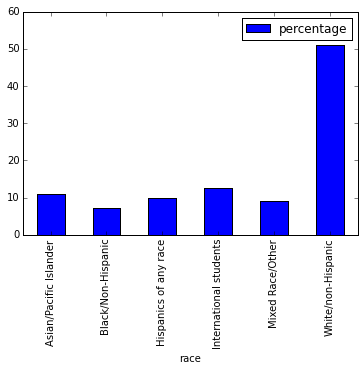

In [81]:
mean_percs.plot(kind="bar");

---

## Conclusion

That's it! It might not look like it but we accomplished a lot. We scraped some data from a website, extracted the parts that we were interested in, and then parsed and cleaned it. We then proceeded to using this data to create a Pandas DataFrame, and use the latter to analyze the data. You should now have the basic knowledge to star working on HW0. Have fun!

* Questions:
    * What is array like in numpy and why iterable does not work
    * what is iterable, why error iterating of non-sequence
    * does unpacking work with iterable or sequence or ...
    * in general how know which one to choose: iterable, seq, container, array-like